In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# set project folder directory
DATA_DIR = '/content/drive/MyDrive/W281 Project/data'
# DATA_DIR = "Downloads/final_project"

In [3]:
# load some lib
import os
import glob
import re
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.notebook import tqdm
import joblib
import cv2

# read in metadata
# df_meta = pd.read_csv(f"{DATA_DIR}/Chest_xray_Corona_Metadata.csv", index_col = 0)
df_meta = pd.read_csv(f"{DATA_DIR}/raw/Chest_xray_Corona_Metadata.csv", index_col = 0)
df_meta_train = df_meta[df_meta['Dataset_type'] == 'TRAIN']
df_meta_test = df_meta[df_meta['Dataset_type'] == 'TEST']
df_meta_train

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...
5304,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,Pnemonia,TRAIN,COVID-19,Virus
5305,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,Pnemonia,TRAIN,COVID-19,Virus
5306,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5307,1-s2.0-S0140673620303706-fx1_lrg.jpg,Pnemonia,TRAIN,COVID-19,Virus


In [ ]:
# get all available test images
unique_images = df_meta_train['X_ray_image_name'].unique()
img_names_list = []

for img in unique_images:
  img_name = img.split(".")[0]
  if img_name not in img_names_list:
    img_names_list.append(img_name)

0it [00:00, ?it/s]

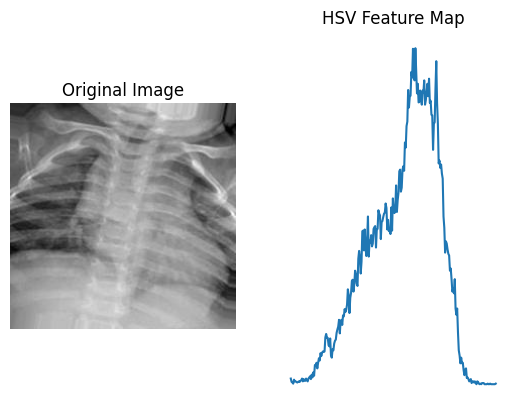

In [ ]:
hist_features = {}

for i, img in tqdm(enumerate(img_names_list[)):
  # path = f"{DATA_DIR}/train_resized_augmented/"
  path = f"{DATA_DIR}/raw/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train_resized_augmented/"
  img_name = "augmented_"+img+"_"
  aug_images_list = list(pathlib.Path(path).glob(f'{img_name}*.jpeg'))
  
  for aug_img_path in aug_images_list:
    img_path = str(aug_img_path)
    img_bgr = cv2.imread(img_path, 1)
            
    # We need to convert RGB image 
    # into gray one because gray 
    # image has one channel only.

    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
    hist_features[img_path[len(path):]] = hist


    plt.subplot(1, 2, 1)
    plt.imshow(img_gray)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.plot(hist)
    plt.title('HSV Feature Map')
    plt.axis('off')

    break
  break

In [ ]:
import pickle

pickle.dump(hist_features, open(f"{DATA_DIR}/hsv_hist_features_train.pkl", "wb"))